# Ejercicio Python
##  Karen Gaona, Ana Mereles & Mariela Navarro

###  Declara Librerías

In [11]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

###  1.  Importa bases

In [15]:
url_test = "https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv"
s_test = requests.get(url_test).content
test = pd.read_csv(io.StringIO(s_test.decode('utf-8')))


url_train = "https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv"
s_train = requests.get(url_train).content
train = pd.read_csv(io.StringIO(s_train.decode('utf-8')))

### 2.  Descripción de variables

####  &nbsp; Tabla 2.1 - Test

| Nombre | Descripción | Posibles Valores | Tipo de Dato | 
| :----: | :---------: | :--------------: | :----------: | 
| Loan_ID | Folio identificador único por crédito | (LP001015 - LPLP002989) | String | 
| Gender | Género del cliente | (Female,Male) | String Categórico | 
| Married | Casado o no | (Yes,No) | Sting Categótico | 
| Dependents | Número de dependientes económicos | (0,1,2,3+) | Categórico | 
| Education | Graduado o no | (Graduate, Not Graduate) | String Categórico | 
| Self_Employed | Persona con actividad empresarial | (yes,no) | String Categórico | 
| ApplicantIncome | Ingresos declarados del titular | (0-80,000) | Continua | 
| CoapplicantIncome | Ingresos declarados del adicional | (0-25,000) | Continua | 
| LoanAmount | Monto del Crédito | (0,550) | Continua | 
| Loan_Amount_Term | Plazo del Crédito | (6,12,36,60,84,120,180,240,300,350,360,480) | Numérica Categórica | 
| Credit_History | Si tiene o no historial crediticio | (0,1) | Numérica Categórica | 
| Property_Area | Área geoestadística | (Urban, Semiurban, Rural) | String Categórico | 

####  &nbsp; Tabla 2.2 - Train

| Nombre | Descripción | Posibles Valores | Tipo de Dato | 
| :----: | :---------: | :--------------: | :----------: | 
| Loan_ID | Folio identificador único por crédito | (LP001015 - LPLP002989) | String | 
| Gender | Género del cliente | (Female,Male) | String Categórico | 
| Married | Casado o no | (Yes,No) | Sting Categótico | 
| Dependents | Número de dependientes económicos | (0,1,2,3+) | Categórico | 
| Education | Graduado o no | (Graduate, Not Graduate) | String Categórico | 
| Self_Employed | Persona con actividad empresarial | (yes,no) | String Categórico | 
| ApplicantIncome | Ingresos declarados del titular | (0-81,000) | Continua | 
| CoapplicantIncome | Ingresos declarados del adicional | (0-41,000) | Continua | 
| LoanAmount | Monto del Crédito | (0,700) | Continua | 
| Loan_Amount_Term | Plazo del Crédito | (6,12,36,60,84,120,180,240,300,350,360,480) | Numérica Categórica | 
| Credit_History | Si tiene o no historial crediticio | (0,1) | Numérica Categórica | 
| Property_Area | Área geoestadística | (Urban, Semiurban, Rural) | String Categórico | 
| Loan_Status | Aceptado o Rechazado | (Yes,No) | String Categórico | 


### 3.  Observaciones, columnas y registros

**- ¿Cuántas observaciones hay en cada Dataset?**

In [3]:
print("El número de observaciones en la base Test es " + str(len(test.index)))
print("El número de observaciones en la base Train es " + str(len(train.index)))

El número de observaciones en la base Test es 367
El número de observaciones en la base Train es 614


**- ¿Cuántas columnas hay en cada Dataset?**

In [4]:
print("El número de columnas en la base Test es " + str(len(test.columns)))
print("El número de columnas en la base Train es " + str(len(train.columns)))

El número de columnas en la base Test es 12
El número de columnas en la base Train es 13


**- Los primeros registros de Test son:**

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**- Los primeros registros de Train son:**

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 4. Valores Nulos

**- &nbsp; ¿Cuántos NAs hay por fila?**

In [12]:
def num_nulos(x):
  return x.isnull().sum()

print("Nas por fila para Test:")
print(test.apply(num_nulos, axis=1))
print("\n")
print("Nas por fila para Train:")
print(test.apply(num_nulos, axis=1))

Nas por fila para Test:
0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     1
13     1
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
337    0
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    1
352    0
353    0
354    0
355    0
356    0
357    0
358    1
359    0
360    1
361    0
362    0
363    0
364    1
365    0
366    0
Length: 367, dtype: int64


Nas por fila para Train:
0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     1
13     1
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
337    0
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347  

**- &nbsp; ¿Cuántos NAs hay por columna?**

In [123]:
print("Nas por columna para Test:")
print(test.apply(num_nulos, axis=0))
print("\n")
print("Nas por columna para Train:")
print(test.apply(num_nulos, axis=0))

Nas por columna para Test:


NameError: name 'num_nulos' is not defined

**- &nbsp; Eliminar las filas donde hay Valores Nulos**

In [49]:
test2 = test.dropna()
test2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [52]:
train2 = train.dropna()
train2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### 5.  Recodificación de variables categóricas a binarias.



In [53]:
dic1 = {
   "Male":"1",
   "Female":"0",
   "Yes":"1",
   "No":"0" ,
   "Graduate":"1",
   "Not Graduate":"0",
   "Y":"1",
   "N":"0"
}
print(dic1)

def funcion1(x):
    for i in dic1.keys():
        x = x.replace(i,dic1[i])    
    return(x) 
    
test3 = funcion1(test2)
train3= funcion1(train2)

{'Male': '1', 'Female': '0', 'Yes': '1', 'No': '0', 'Graduate': '1', 'Not Graduate': '0', 'Y': '1', 'N': '0'}


In [54]:
test3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,Urban


In [55]:
train3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


### 6.  Estadística descriptiva




**- &nbsp; Base de Test**

In [22]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**- &nbsp; Base de Train**

In [122]:
train.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 **- ¿Cuántas observaciones se tienen para las variables categóricas? (Test)**

In [121]:
test3["Gender"].value_counts()

1    230
0     59
Name: Gender, dtype: int64

In [120]:
test3["Married"].value_counts()

1    187
0    102
Name: Married, dtype: int64

In [119]:
test3["Dependents"].value_counts()

0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64

In [118]:
test3["Education"].value_counts()

1    224
0     65
Name: Education, dtype: int64

In [117]:
test3["Self_Employed"].value_counts()

0    257
1     32
Name: Self_Employed, dtype: int64

In [116]:
test3["Loan_Amount_Term"].value_counts()

360.0    248
180.0     19
480.0      7
300.0      6
240.0      2
84.0       2
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [115]:
test3["Credit_History"].value_counts()

1.0    243
0.0     46
Name: Credit_History, dtype: int64

In [114]:
test3["Property_Area"].value_counts()

Urban        113
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64

 **- ¿Cuántas observaciones se tienen para las variables categóricas? (Train)**

In [71]:
train3["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [72]:
train3["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [73]:
train3["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [74]:
train3["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [75]:
train3["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [82]:
train3["Loan_Amount_Term"].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [83]:
train3["Credit_History"].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [84]:
train3["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [85]:
train3["Loan_Status"].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

### 7.  Crosstab

**- ¿Le otrogan más Créditos a las mujeres que a los hombres?**

In [7]:
pd.crosstab(train["Gender"],train["Loan_Status"],margins=False,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


*R =  No, en la tabla anterior se observa que el sexo no es una variable que discrimine el otorgamiento de los Créditos ya que se le otorgan créditos al mismo porcentaje de hombres que de mujeres.*

<br>

**- ¿Es más fácil que se otorgue un crédito si se tiene historial crediticio?**

In [8]:
pd.crosstab(train["Credit_History"],train["Loan_Status"],margins=False,normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


*R =  Si, en la tabla anterior se observa que al 80% de las personas que tienen historial crediticio se les otorga el Crédito mientras que únicamente al 7% de las personas que no tienen historial crediticio se les otorga un crédito.*

### 8.  Histogramas

**- Ingreso del titular**

<function matplotlib.pyplot.show(*args, **kw)>

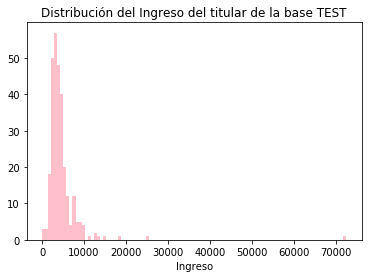

In [108]:

plt.hist(test3["ApplicantIncome"],100,color=['pink'])
plt.xlabel("Ingreso")
plt.title("Distribución del Ingreso del titular de la base TEST")
plt.show

*Podemos observar que la distribución de ingreso del titular está concentrada en montos menores a 10,000 pesos y más del 50 % de la población tiene un ingreso alrededor de 4,000 pesos. Adicional, podemos identificar que sólo un aplicante tiene ingreso de 72,000 pesos.*

<function matplotlib.pyplot.show(*args, **kw)>

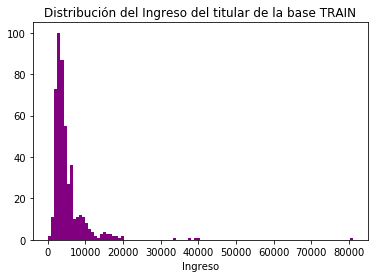

In [109]:
plt.hist(train3["ApplicantIncome"],100,color=['purple'])
plt.xlabel("Ingreso")
plt.title("Distribución del Ingreso del titular de la base TRAIN")
plt.show

*Al realizar la comparación contra la base de Test se puede observar que las distribuciones son muy similares con un promedio de 5,200 pesos por aplicante y un outlier de 81,000 pesos.*

**- Monto prestado**

<function matplotlib.pyplot.show(*args, **kw)>

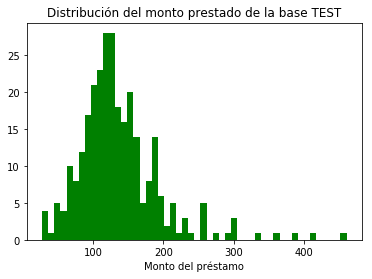

In [124]:
plt.hist(test3["LoanAmount"],50,color=['green'])
plt.xlabel("Monto del préstamo")
plt.title("Distribución del monto prestado de la base TEST")
plt.show

*Podemos observar que la distribución del monto del préstamo está concentrada en montos menores a 200 pesos y más del 50 % de la población obtuvo un préstamo mayor a 125 pesos. Adicional, podemos identificar que sólo un aplicante tuvo un préstamo de 550 pesos.*

<function matplotlib.pyplot.show(*args, **kw)>

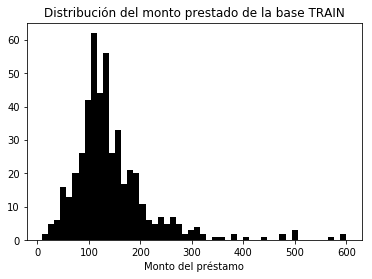

In [126]:
plt.hist(train3["LoanAmount"],50,color=['black'])
plt.xlabel("Monto del préstamo")
plt.title("Distribución del monto prestado de la base TRAIN")
plt.show

*Al realizar la comparación contra la base de Test se puede observar que las distribuciones son muy similares con un monto de préstamo otorgado promedio de 146 pesos, además se puede observar también que, igual que en la base de Test, hay un individuo que obtuvo un préstamo muy alto de casi 600 pesos.*

### 9.  Boxplot

**- Cantidad del préstamo según el historial crediticio**

Text(0.5,0.98,'')

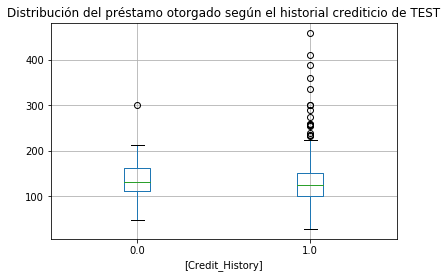

In [107]:
test3.boxplot(column=["LoanAmount"],by=["Credit_History"])
plt.title("Distribución del préstamo otorgado según el historial crediticio de TEST")
plt.suptitle("")

*La diferencia entre el monto de préstamo otorgado entre individuos con y sin Historial Crediticio no es muy grande, se puede observar que:<br>*
*- La mediana de los montos es muy parecida en ambas poblaciones, es decir, la mayoría de los montos otorgados en ambos casos es la misma (al rededor de 130).<br>*
*- Los bigotes de la gráfica indican que los montos de los clientes con Historial Crediticio tienen una varianza ligeramente más alta que los clientes Sin Historial.<br>*
*- La diferencia más grande se observa en que los clientes con Historial Crediticio presentan más valores atípicos en la parte superior, es decir, hay más individuos con montos de préstamos más altos.<br>*
*- Se observa que hay clientes que en algunos casos, aún teniendo Historial Crediticio, obtienen préstamos con montos más bajos.*

Text(0.5,0.98,'')

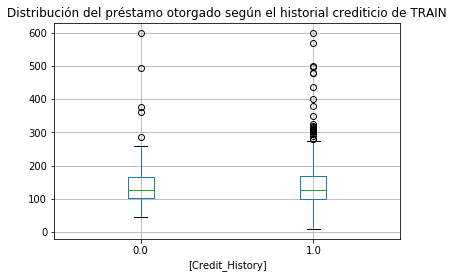

In [127]:
train3.boxplot(column=["LoanAmount"],by=["Credit_History"])
plt.title("Distribución del préstamo otorgado según el historial crediticio de TRAIN")
plt.suptitle("")

*A diferencia de la base TEST, se observa un par de clientes más que se agregaron a los valores atípicos de los clientes Sin Historial Crediticio pero siguen siendo más en los clientes Con Historial Crediticio*

**- Cantidad del préstamo según el sexo**

Text(0.5,0.98,'X')

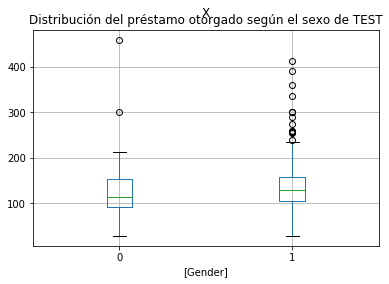

In [128]:
test3.boxplot(column=["LoanAmount"],by=["Gender"])
plt.title("Distribución del préstamo otorgado según el sexo de TEST")
plt.suptitle("")

*Donde:  0 = Mujer  y  1 = Hombre*
*La diferencia entre el monto de préstamo otorgado por sexo tampoco es significativo, se puede observar que:<br>*
*- La mediana de los montos es muy parecida en ambas poblaciones, es decir, la mayoría de los montos otorgados en ambos casos es la misma (al rededor de 120).<br>*
*- Los bigotes de la gráfica indican que los montos otorgados a las mujeres tienen una varianza ligeramente más alta que los hombres.<br>*
*- La diferencia más grande se observa en que las mujeres presentan más valores atípicos en la parte superior, es decir, hay más individuos con montos de préstamos más altos.<br>*
*- Se observa que el préstamo más alto fue otorgado a un hombre.*

Text(0.5,0.98,'')

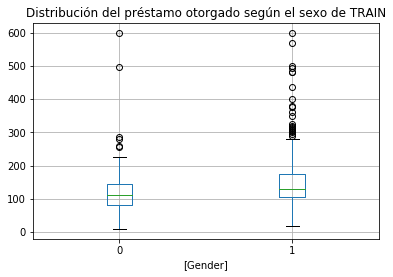

In [106]:
train3.boxplot(column=["LoanAmount"],by=["Gender"])
plt.title("Distribución del préstamo otorgado según el sexo de TRAIN")
plt.suptitle("")

*A diferencia de la base TEST, se observa un par de clientes más que se agregaron a los valores atípicos de los hombres pero siguen siendo más en las mujeres.  En este caso a ambos sexos se les otorgó el préstamo con monto más alto (600 pesos)*